<a href="https://colab.research.google.com/github/rohitgupta29/AI7-/blob/master/Clinical_conclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

import numpy as np

In [3]:
file ="https://raw.githubusercontent.com/rohitgupta29/AI7-/master/COVID%20clinical%20trials.csv"


trials = pd.read_csv(file)

In [4]:
trials.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [6]:
covid_updated = trials.drop(['URL', 'Study Results', 'Study Documents','Results First Posted', 'Last Update Posted', 'Outcome Measures','Study Designs','First Posted','Other IDs'],axis =1)

In [7]:
covid_updated.head()

,Rank,NCT Number,Title,Acronym,Status,Conditions,Interventions,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Primary Completion Date,Completion Date,Locations
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,covid19,Other: Lung CT scan analysis in COVID-19 patients,University of Milano Bicocca,All,"18 Years and older (Adult, Older Adult)",NaN,500.0,Other,Observational,"April 15, 2020","June 15, 2020","October 15, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P..."
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,18 Years to 48 Years (Adult),NaN,50.0,Other,Observational,"May 5, 2020",May 2021,May 2021,"CHR Orléans, Orléans, France"
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,COVID-BF,Not yet recruiting,Covid19|Exclusive Breastfeeding,Behavioral: COVID-19 Breastfeeding Support,Meharry Medical College,Female,18 Years to 45 Years (Adult),Not Applicable,200.0,Other,Interventional,September 2020,October 2021,June 2022,"Meharry Medical College, Nashville, Tennessee,..."
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,FRA-COVID,Recruiting,Covid19,Other: Relation between frailty and clinical o...,University of Milano Bicocca,All,"18 Years and older (Adult, Older Adult)",NaN,300.0,Other,Observational,"March 1, 2020",June 2020,"March 1, 2021","ASST Monza-Ospedale San Gerardo, Monza, Italy"
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,COVID-19 ORL,Recruiting,covid19,Other: Investigation of smell and taste disorders,University of Milano Bicocca,All,"18 Years and older (Adult, Older Adult)",NaN,500.0,Other,Observational,"May 15, 2020","June 30, 2020","September 30, 2020","ASST Monza-Ospedale San Gerardo, Monza, Italy"


In [8]:
import cufflinks as cf
import plotly.graph_objs as go
cf.go_offline()

covid_updated['Phases'].value_counts().drop('Not Applicable').iplot(kind='bar', color='blue',
                                                                    xTitle='Vaccine Phase Types',
                                                                    yTitle='Number of Candidates')

In [9]:
# Find the final phase candidates

covid_updated['country'] = covid_updated['Locations'].apply(lambda x: str(x).split()[-1])
covid_updated['country'].value_counts().drop('nan').sort_values(ascending=False)[:15].iplot(kind='bar', bins=30,xTitle='Vaccine Clinical Trials', yTitle='Country')

In [12]:
import re
def cleanAge(age):
    if len(re.findall(r'\(.*\)',age)):
        return re.findall(r'\(.*\)',age)[0]
    return '('+age+')'

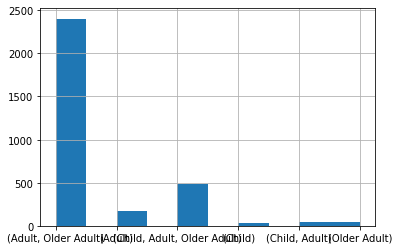

In [13]:
ageData = trials.Age.apply(lambda x : cleanAge(x))
ageData.hist()

In [15]:
trials['AgeBrackets'] = ageData

In [18]:
from plotly.subplots import make_subplots

i = 0
fig = make_subplots(rows=3, cols=2, subplot_titles=list(pd.DataFrame(trials.groupby(['AgeBrackets'])['Gender'].value_counts()).unstack().index))
for row in range(1,4):
    for col in range(1,3):
        dt = pd.DataFrame(trials.groupby(['AgeBrackets'])['Gender'].value_counts()).unstack().iloc[i]
        fig.add_trace(go.Bar(x=dt.Gender.index,y=dt.Gender.values),row = row, col = col)        
        i+=1
fig.show()